<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/2021%E5%B9%B41%E6%9C%885%E6%97%A5%E3%83%99%E3%82%A4%E3%82%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer

In [ ]:
df = pd.read_csv("spam.csv")
df.head()

,type,text
0,ham,Go until jurong point crazy.. Available only ...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives aro...


In [ ]:
df["type"] = df["type"].map(lambda x:1 if x =="spam" else 0)

In [ ]:
x = df.drop(["type"], axis=1)
y = df["type"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec_count = CountVectorizer(min_df=3)
vec_count.fit(x_train["text"])

print("word size: ",len(vec_count.vocabulary_))
print("word content:", dict(list(vec_count.vocabulary_.items())[0:5]))

word size:  2185
word content: {'how': 924, 'are': 217, 'you': 2175, 'just': 1021, 'checking': 426}


In [ ]:
x_train_vec = vec_count.transform(x_train["text"])
x_test_vec = vec_count.transform(x_test["text"])

pd.DataFrame(x_train_vec.toarray()[0:5], columns=vec_count.get_feature_names())

,00,000,02,03,04,05,06,0800,08000839402,08000930705,08002986906,08452810073,0870,08702840625,08707509020,08712300220,08712405020,08712460324,08715705022,08718720201,087187262701,08718727870,09050090044,09061209465,10,100,1000,1000s,10am,10k,10p,11,11mths,12,125gift,12hrs,1327,150,150p,150pm,...,ws,wtf,wud,wun,www,xmas,xx,xxx,xxxx,xy,ya,yahoo,yan,yar,yay,yeah,year,years,yeh,yep,yes,yest,yesterday,yet,yetunde,yijue,ym,yo,yoga,yogasana,you,your,yours,yourself,yr,yrs,yummy,yup,zed,áegot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train_vec, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
#指数表記の禁止
np.set_printoptions(suppress=True)
model.predict_proba(x_test_vec)

array([[1.        , 0.        ],
       [0.02155344, 0.97844656],
       [0.99999541, 0.00000459],
       ...,
       [0.9999997 , 0.0000003 ],
       [0.99999998, 0.00000002],
       [0.99999976, 0.00000024]])

In [ ]:
model.predict(x_test_vec)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
print("confusion matrix =")
print(confusion_matrix(y_true = y_test, y_pred = model.predict(x_test_vec)))

confusion matrix =
[[1444    2]
 [  24  202]]


In [ ]:
print("正解率(train):{:.3f}". format(model.score(x_train_vec, y_train)))
print("正解率(test):{:.3f}". format(model.score(x_test_vec, y_test)))

#from sklearn.metrics import precision_score
#print("precision =",precision_score(y_true = y_test, y_pred = model.predict(x_test)))

#from sklearn.metrics import recall_score
#print("recall =",recall_score(y_true = y_test, y_pred = model.predict(x_test)))

#from sklearn.metrics import f1_score
#print("f1 =",f1_score(y_true = y_test, y_pred = model.predict(x_test)))

#from sklearn.metrics import roc_auc_score
#print("auc =",roc_auc_score(y_true = y_test, y_score = model.predict_proba(x_test)[:, 1]))

正解率(train):0.988
正解率(test):0.984


In [ ]:
from sklearn.metrics import precision_score
print("precision =",precision_score(y_true = y_test, y_pred = model.predict(x_test_vec)))

precision = 0.9901960784313726


In [ ]:
from sklearn.metrics import recall_score
print("recall =",recall_score(y_true = y_test, y_pred = model.predict(x_test_vec)))

recall = 0.8938053097345132


In [ ]:
from sklearn.metrics import f1_score
print("f1 =",f1_score(y_true = y_test, y_pred = model.predict(x_test_vec)))

f1 = 0.9395348837209303


In [ ]:
from sklearn.metrics import roc_auc_score
print("auc =",roc_auc_score(y_true = y_test, y_score = model.predict_proba(x_test_vec)[:, 1]))

auc = 0.9940758148814551


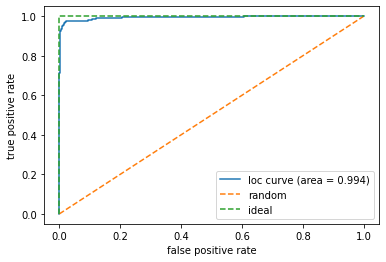

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_score = model.predict_proba(x_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

plt.plot(fpr, tpr, label="loc curve (area = %0.3f)" % auc(fpr, tpr))
plt.plot([0,1],[0,1], linestyle="--", label="random")
plt.plot([0,0,1],[0,1,1], linestyle="--", label="ideal")
plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [ ]:
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

df["type"] = cancer.target
df.head()

x = df.drop(["type"], axis=1)
y = df["type"]

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)

In [ ]:
print("Cross validation scores: {}".format(scores))
print("Cross validation scores: {:.3f}+-{:.3f}".format(scores.mean(), scores.std()))

Cross validation scores: [0.90350877 0.9122807  0.95614035 0.93859649 0.95575221]
Cross validation scores: 0.933+-0.022
